# Predictive Stock Trading Through Machine Learning  with Sklearn's Linear Regression - User friendly Prototype

Time Submitted: () GMT+8, ()

## Testing Grounds

In [1]:
# Settings (EDIT THIS): 
stockname = 'AC'
inputfile = 'AC_WSJ.csv'       # company historical data 
closeDate =  '2018-03-28'       # row 0 of stock.head() or last trading day data. Scroll down to check. Form: Y-M-D
startPredtest = '2018-03-15'    # 13 days ahead of close date
endPredtest = closeDate
Pyear, Pmonth, Pday = 2018, 4, 2 #The monday after.
MonAfter = '2018-04-02'          # same as previous

# See Predictions in the last cell (Do Restart & Run All in Kernel. See Prediction Graph in Last Cell)

xStartPred = '2018-03-15'        
xEndPred = '2018-04-06'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
from adjustText import adjust_text

## Part 1: Predict JFC stocks from 3/5/18 - 3/16/18 then compare with latest WSJ Data 

Since Google Finance data is not currently updated, we could get data from Wall Street Journal. Instead of using an API, we have to download csv files from the website.
Download csv file of JFC prices from 2013-1-1 to 2018-3-17.

Source: http://quotes.wsj.com/PH/XPHS/JFC/historical-prices

Import data.

In [3]:
stock = pd.read_csv(inputfile)

Inspect dataframe.

In [4]:
stock.columns

Index([u'Date', u' Open', u' High', u' Low', u' Close', u' Volume'], dtype='object')

Remove spaces from column names by renaming them.

In [5]:
stock.rename(columns=lambda x: x.strip(), inplace=True)
stock.columns

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume'], dtype='object')

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 6 columns):
Date      1276 non-null object
Open      1276 non-null float64
High      1276 non-null float64
Low       1276 non-null float64
Close     1276 non-null float64
Volume    1276 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.9+ KB


In [7]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,03/28/18,948.0,958.5,945.0,948.0,436970
1,03/27/18,951.0,963.0,945.0,949.0,293370
2,03/26/18,928.0,952.0,917.0,950.0,559020
3,03/23/18,927.0,927.0,908.0,918.0,618010
4,03/22/18,918.0,938.5,918.0,937.0,666380


In [8]:
stock.tail()

,Date,Open,High,Low,Close,Volume
1271,01/08/13,555.0,557.0,549.5,550.5,491840
1272,01/07/13,545.0,552.5,544.5,550.0,532440
1273,01/04/13,537.0,544.5,536.0,544.0,682300
1274,01/03/13,532.0,549.0,526.0,534.0,745150
1275,01/02/13,517.0,526.5,516.0,526.0,332320


In [9]:
stock.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

No NaN values!!!
However, we have to rearrange the data from descending to ascending order.

In [10]:
stock = stock.reindex(index=stock.index[::-1]).reset_index(drop=True)

In [11]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,01/02/13,517.0,526.5,516.0,526.0,332320
1,01/03/13,532.0,549.0,526.0,534.0,745150
2,01/04/13,537.0,544.5,536.0,544.0,682300
3,01/07/13,545.0,552.5,544.5,550.0,532440
4,01/08/13,555.0,557.0,549.5,550.5,491840


In [12]:
stock.tail()

,Date,Open,High,Low,Close,Volume
1271,03/22/18,918.0,938.5,918.0,937.0,666380
1272,03/23/18,927.0,927.0,908.0,918.0,618010
1273,03/26/18,928.0,952.0,917.0,950.0,559020
1274,03/27/18,951.0,963.0,945.0,949.0,293370
1275,03/28/18,948.0,958.5,945.0,948.0,436970


Convert 'Date' column as datetime objects and set it as index column.

In [13]:
stock['Date'] = pd.to_datetime(stock['Date'], infer_datetime_format=True)

In [14]:
stock.set_index('Date',inplace=True)

In [15]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1276 entries, 2013-01-02 to 2018-03-28
Data columns (total 5 columns):
Open      1276 non-null float64
High      1276 non-null float64
Low       1276 non-null float64
Close     1276 non-null float64
Volume    1276 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.8 KB


In [16]:
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-22,918.0,938.5,918.0,937.0,666380
2018-03-23,927.0,927.0,908.0,918.0,618010
2018-03-26,928.0,952.0,917.0,950.0,559020
2018-03-27,951.0,963.0,945.0,949.0,293370
2018-03-28,948.0,958.5,945.0,948.0,436970


Create Copy for exercise.

In [18]:
stockC = stock[stock.index.isin(pd.date_range(start='2013-01-01', end= closeDate))]
stockC.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-15,1017.0,1037.0,1006.0,1006.0,361985
2018-03-16,1006.0,1020.0,990.0,990.0,1094400
2018-03-19,995.0,1010.0,995.0,1010.0,185980
2018-03-20,948.0,959.0,935.0,937.0,1040930
2018-03-21,945.0,948.5,916.0,916.0,423860
2018-03-22,918.0,938.5,918.0,937.0,666380
2018-03-23,927.0,927.0,908.0,918.0,618010
2018-03-26,928.0,952.0,917.0,950.0,559020
2018-03-27,951.0,963.0,945.0,949.0,293370


Notice that there are no values for 3/3 and 3/4. Trading days excluse weekends and holidays.

Add Prediction column which contains the predicted Close column value n trading days later.

The contents of the new column are just the values of the Close column shifted 5 days backwards, therefore, n=-5

In [19]:
n=-10
stockC['Prediction'] = stockC['Close'].shift(n)
stockC.tail(11)

,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2018-03-14,1038.0,1038.0,1004.0,1038.0,451250,948.0
2018-03-15,1017.0,1037.0,1006.0,1006.0,361985,NaN
2018-03-16,1006.0,1020.0,990.0,990.0,1094400,NaN
2018-03-19,995.0,1010.0,995.0,1010.0,185980,NaN
2018-03-20,948.0,959.0,935.0,937.0,1040930,NaN
2018-03-21,945.0,948.5,916.0,916.0,423860,NaN
2018-03-22,918.0,938.5,918.0,937.0,666380,NaN
2018-03-23,927.0,927.0,908.0,918.0,618010,NaN
2018-03-26,928.0,952.0,917.0,950.0,559020,NaN


In [20]:
len(stockC)

1276

In order to prepare the data for machine learning, we have to delete all rows with NaN values.

In [21]:
from sklearn import preprocessing

In [22]:
X = preprocessing.scale(stockC.drop(['Prediction'], axis=1))

In [23]:
X_predict = X[n:]
X = X[:n]

In [24]:
y = stockC['Prediction'][:n]

In [25]:
print(type(X), type(X_predict), type(y))

(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>, <class 'pandas.core.series.Series'>)


In [26]:
print(len(X), len(X_predict), len(y))

(1266, 10, 1266)


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.2))

In [29]:
print(type(X_train), type(X_test), type(y_train), type(y_test) )

(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>)


In [30]:
print(len(X_train), len(X_test), len(y_train), len(y_test) )

(1012, 254, 1012, 254)


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

lm = SVR(kernel='linear', C=1)
scores = cross_val_score(lm, X, y, cv=10)
scores #score for each split

array([ 0.40664601, -0.2721994 ,  0.81330779, -0.43371904, -0.14837331,
        0.20810755,  0.6948363 ,  0.43226622,  0.35807705, -0.56369999])

In [35]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.15 (+/- 0.90)


In [36]:
lm.fit(X_train, y_train)
accuracy = lm.score(X_test, y_test)
print('Accuracy: '+str(accuracy*100)+'%')

Accuracy: 93.9794443586%


### Predictions

In [37]:
predictions = lm.predict(X_test)

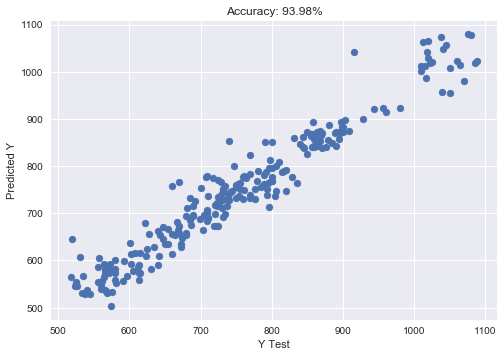

In [38]:
plt.scatter(y_test,predictions)
plt.title('Accuracy: '+str((accuracy*100).round(2))+'%')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
sns.set_style('whitegrid')

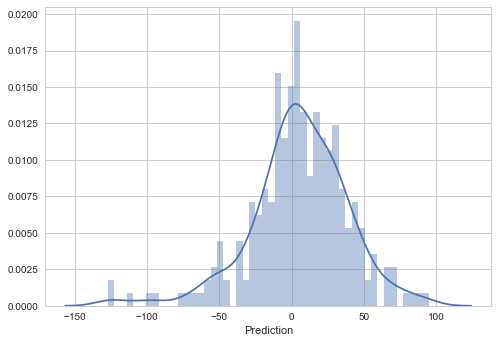

In [39]:
sns.distplot((y_test-predictions),bins=50)

In [40]:
predr_i = stock.index.get_loc(pd.Timestamp(startPredtest)) #start predict  # 13 days ahead of close
predr_i

1266

In [41]:
predr_f = stock.index.get_loc(pd.Timestamp(closeDate)) #end predict endPredtest = closeDate
predr_f

1275

In [42]:
predr_index = stock.index[predr_i:predr_f+1]
predr_index

DatetimeIndex(['2018-03-15', '2018-03-16', '2018-03-19', '2018-03-20',
               '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-26',
               '2018-03-27', '2018-03-28'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

In [43]:
stock_later = lm.predict(X_predict)
Predicted_stock = pd.Series(stock_later, index=predr_index).round(2)
print('Predicted values for 3/15-3/28: \n') 
print(Predicted_stock)

Predicted values for 3/15-3/28: 

Date
2018-03-15    1011.28
2018-03-16     992.83
2018-03-19     999.08
2018-03-20     938.27
2018-03-21     928.23
2018-03-22     924.37
2018-03-23     916.54
2018-03-26     933.47
2018-03-27     949.38
2018-03-28     946.62
dtype: float64


Actual values

In [44]:
Actual = pd.Series(stock['Close'].loc[predr_index])
print(Actual)

Date
2018-03-15    1006.0
2018-03-16     990.0
2018-03-19    1010.0
2018-03-20     937.0
2018-03-21     916.0
2018-03-22     937.0
2018-03-23     918.0
2018-03-26     950.0
2018-03-27     949.0
2018-03-28     948.0
Name: Close, dtype: float64


Create dataframe for comparison.

In [45]:
stock_c = pd.DataFrame({'Actual':Actual,'Predicted':Predicted_stock}).set_index(predr_index).round(2)
stock_c

,Actual,Predicted
Date,,
2018-03-15,1006.0,1011.28
2018-03-16,990.0,992.83
2018-03-19,1010.0,999.08
2018-03-20,937.0,938.27
2018-03-21,916.0,928.23
2018-03-22,937.0,924.37
2018-03-23,918.0,916.54
2018-03-26,950.0,933.47
2018-03-27,949.0,949.38


## Part 1.2: Visualization 

In [46]:
pred_color='blue'

In [47]:
actual_color='red'

In [48]:
stock_name = stockname

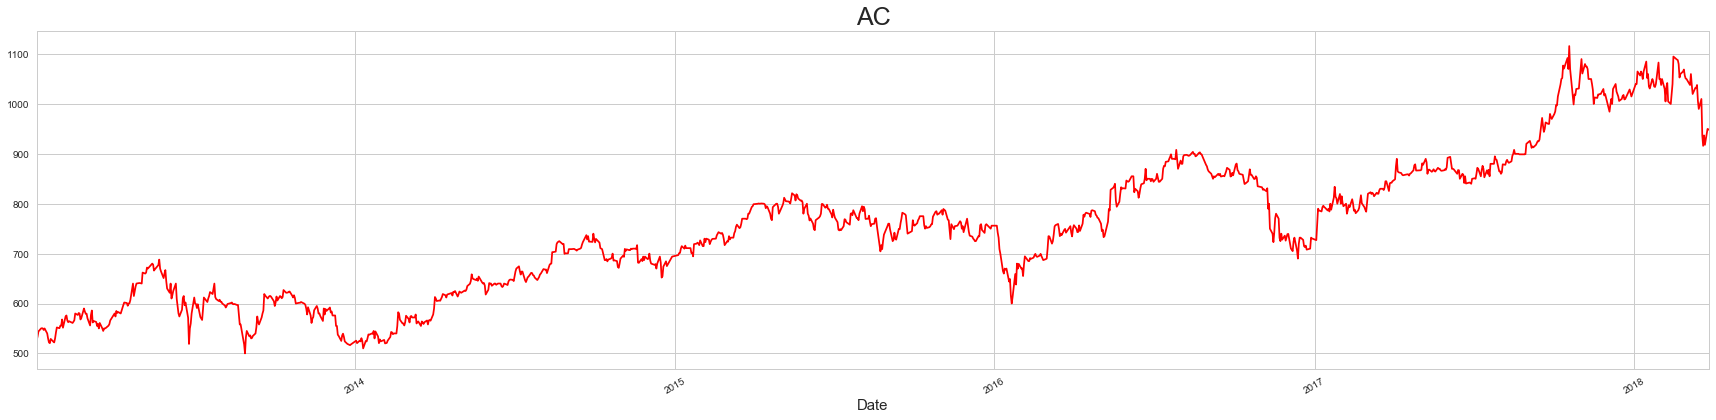

In [49]:
plt.title(stock_name, fontsize=25)

stock['Close'].plot(figsize=(24,6),legend=None, color=actual_color)

#jfc['Close'].plot(figsize=(24,6),legend=None, color=actual_color)

#plt.ylabel('Closing Price (₱)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xlim(xmin=stock.index[0], xmax=stock.index[-1])
plt.xticks(ha='center')

plt.tight_layout()

Create linking. This will be used to link the line graphs of predicted and actual values.

In [50]:
l_i = stock['Close'].loc[stockC.index[n-1]]
l_i

1038.0

In [51]:
l_f = stock_c['Predicted'][stock_c.index[0]]
l_f

1011.28

In [52]:
link_i = stock.index.get_loc(pd.Timestamp('2018-03-02')) #start plot
#link_i = stock.index.get_loc(pd.Timestamp('2018-03-16')) #start plot
link_i

1257

In [53]:
link_f = stock.index.get_loc(pd.Timestamp('2018-03-05')) #2nd entry plot
#link_f = stock.index.get_loc(pd.Timestamp('2018-03-19')) #2nd entry plot
link_f

1258

In [54]:
link_index = stock.index[link_i:link_f+1]
link_index

DatetimeIndex(['2018-03-02', '2018-03-05'], dtype='datetime64[ns]', name=u'Date', freq=None)

In [55]:
stock_l = pd.DataFrame({'Link':[l_i,l_f]}, index=link_index)
stock_l

,Link
Date,
2018-03-02,1038.00
2018-03-05,1011.28


Combine stock_l and stock_c

In [56]:
stock_future = pd.DataFrame({'Predicted':stock_l['Link'].combine_first(stock_c['Predicted'])})
stock_future

,Predicted
Date,
2018-03-02,1038.00
2018-03-05,1011.28
2018-03-15,1011.28
2018-03-16,992.83
2018-03-19,999.08
2018-03-20,938.27
2018-03-21,928.23
2018-03-22,924.37
2018-03-23,916.54


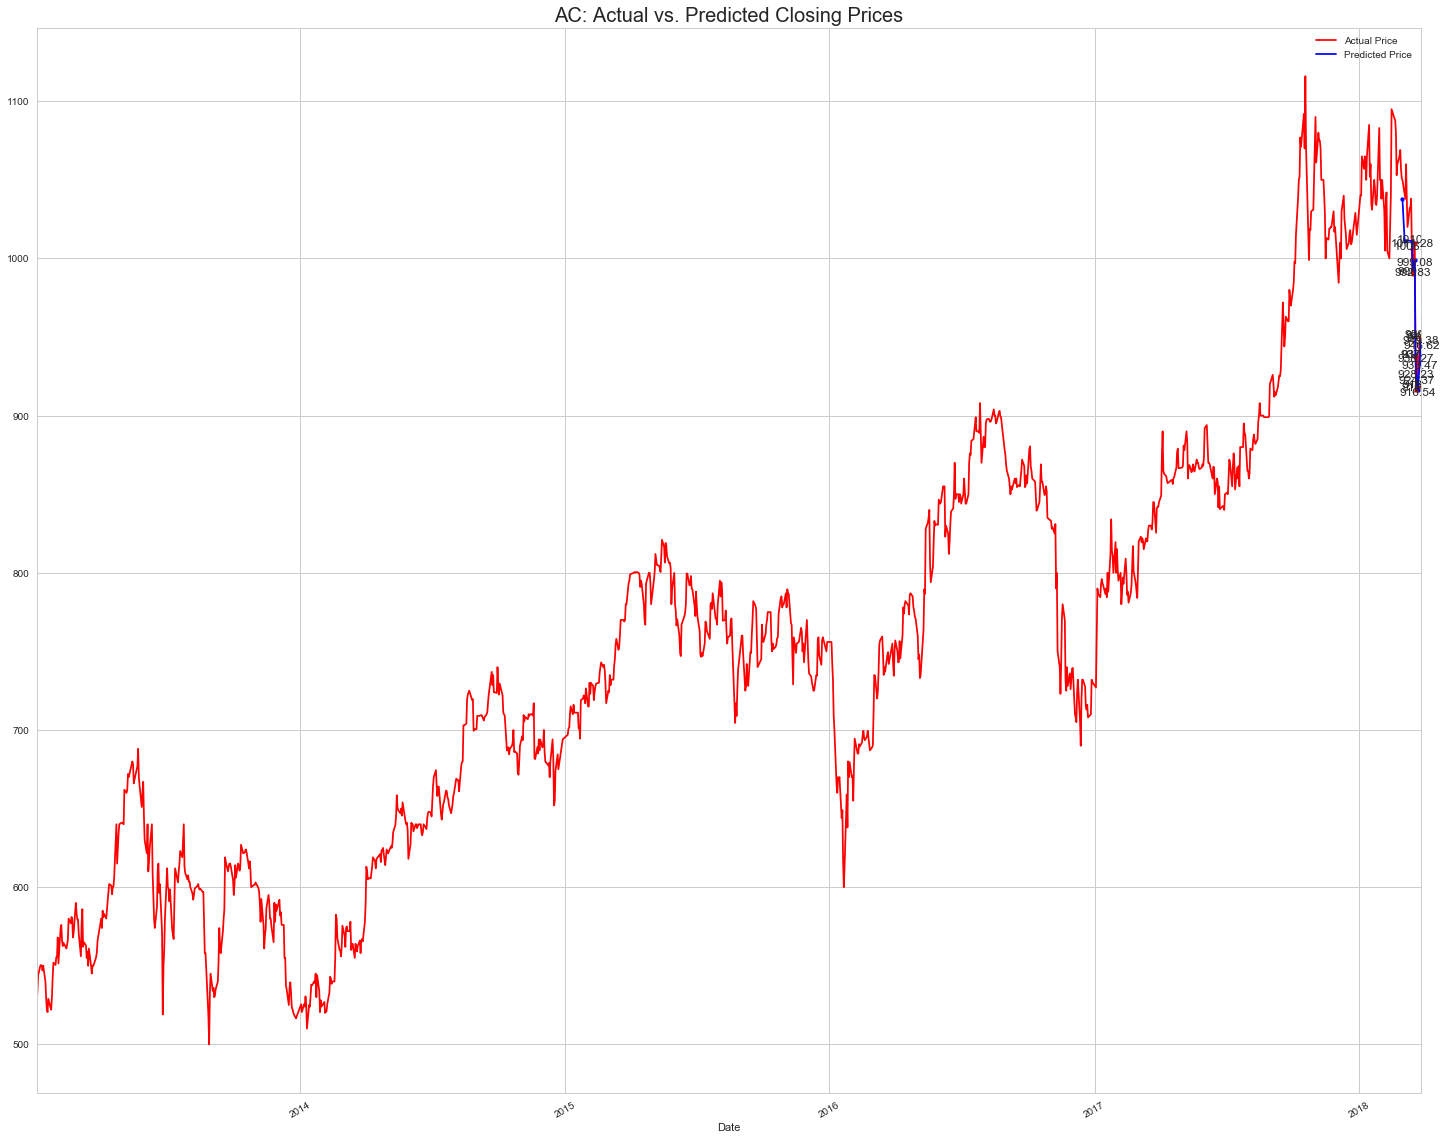

In [57]:
#%matplotlib qt
plt.figure(figsize=(20,16))
plt.title(stock_name + ": Actual vs. Predicted Closing Prices", fontsize=20)

stock['Close'].plot(label='Actual Price', legend=True, color=actual_color)
stock_future['Predicted'].plot(label='Predicted Price', legend=True, color=pred_color)

for i, txt in enumerate(stock_c['Predicted']):
    plt.annotate(txt, (stock_c.index[i],stock_c['Predicted'][i]), 
                xytext=(stock_c.index[i],stock_c['Predicted'][i]-5),
                horizontalalignment='center', verticalalignment='bottom',
                arrowprops=dict(arrowstyle="-",color=pred_color))
    
for i, txt in enumerate(stock_c['Actual']):
    plt.annotate(txt, (stock_c.index[i],stock_c['Actual'][i]), 
                xytext=(stock_c.index[i],stock_c['Actual'][i]+5),
                horizontalalignment='center', verticalalignment='top',
                arrowprops=dict(arrowstyle="-",color=actual_color), clip_on=True)

plt.scatter(stock_future.index,stock_future['Predicted'], s=15, color=pred_color)
plt.scatter(stock_c.index,stock_c['Actual'], s=15, color=actual_color)

#plt.xlim('2018-03-01', '2018-03-17')
#plt.xlim('2018-03-28', '2018-03-29')

#plt.ylim(ymin=270,ymax=320)
#plt.xlabel('\nDate', fontsize=20)
#plt.ylabel('Closing Price (₱)\n', fontsize=20)
plt.xticks(ha='center')

plt.tight_layout()
#plt.show()

# Part 2: Predict JFC stocks from Close Date + 4 days 

In [58]:
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-01-02,517.0,526.5,516.0,526.0,332320
2013-01-03,532.0,549.0,526.0,534.0,745150
2013-01-04,537.0,544.5,536.0,544.0,682300
2013-01-07,545.0,552.5,544.5,550.0,532440
2013-01-08,555.0,557.0,549.5,550.5,491840


In [59]:
stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-22,918.0,938.5,918.0,937.0,666380
2018-03-23,927.0,927.0,908.0,918.0,618010
2018-03-26,928.0,952.0,917.0,950.0,559020
2018-03-27,951.0,963.0,945.0,949.0,293370
2018-03-28,948.0,958.5,945.0,948.0,436970


In [60]:
n=-5 # of days ahead 
stock['Prediction'] = stock['Close'].shift(n)
stock.tail(10)                               

,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2018-03-15,1017.0,1037.0,1006.0,1006.0,361985,937.0
2018-03-16,1006.0,1020.0,990.0,990.0,1094400,918.0
2018-03-19,995.0,1010.0,995.0,1010.0,185980,950.0
2018-03-20,948.0,959.0,935.0,937.0,1040930,949.0
2018-03-21,945.0,948.5,916.0,916.0,423860,948.0
2018-03-22,918.0,938.5,918.0,937.0,666380,NaN
2018-03-23,927.0,927.0,908.0,918.0,618010,NaN
2018-03-26,928.0,952.0,917.0,950.0,559020,NaN
2018-03-27,951.0,963.0,945.0,949.0,293370,NaN


In [61]:
len(stock)

1276

In [62]:
X = preprocessing.scale(stock.drop(['Prediction'], axis=1))

In [63]:
X_predict = X[n:]
X = X[:n]

In [64]:
y = stock['Prediction'][:n]

In [65]:
len(X)

1271

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.2))

In [67]:
lm.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
accuracy = lm.score(X_test, y_test)
#print('Accuracy: '+str(score*100)+'%')
print('Accuracy: '+str(accuracy*100)+'%')

Accuracy: 96.647569381%


### Cross Validation 

In [69]:
lm = SVR(kernel='linear', C=1)
scores = cross_val_score(lm, X, y, cv=5)
scores #score for each split

array([ 0.59145994,  0.92657219,  0.64114122,  0.78323159,  0.87112761])

In [70]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.26)


In [71]:
lm.fit(X_train, y_train)
accuracy = lm.score(X_test, y_test)
#print('Accuracy: '+str(score*100)+'%')
print('Accuracy: '+str(accuracy*100)+'%')

Accuracy: 96.647569381%


### Predictions 

In [72]:
predictions = lm.predict(X_test)

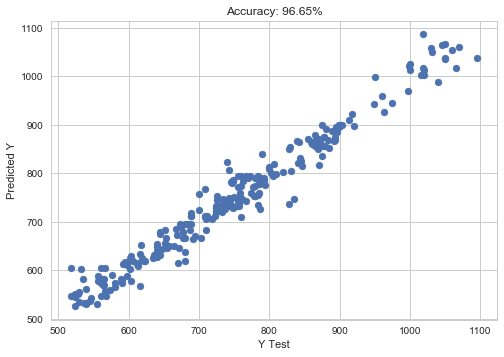

In [73]:
plt.scatter(y_test,predictions)
plt.title('Accuracy: '+str((accuracy*100).round(2))+'%')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
sns.set_style('whitegrid')

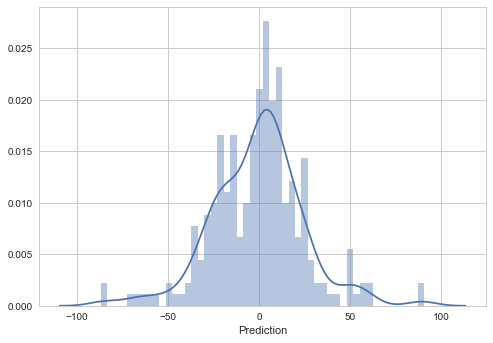

In [74]:
sns.distplot((y_test-predictions),bins=50)

In [75]:
stock_later = lm.predict(X_predict)

#days = pd.DatetimeIndex(pd.date_range(datetime(2018, 3, 19), datetime(2018, 3, 19) + timedelta(4), freq='D'))
days = pd.DatetimeIndex(pd.date_range(datetime(Pyear, Pmonth, Pday), datetime(Pyear, Pmonth, Pday) + timedelta(4), freq='D'))
stock_future = pd.Series(stock_later, index=days)
stock_future = pd.DataFrame({'Predicted':stock_future}).set_index(days).round(2)
stock_future

,Predicted
2018-04-02,926.95
2018-04-03,918.67
2018-04-04,935.50
2018-04-05,949.92
2018-04-06,948.00


In [76]:
L_i = stock['Close'].loc[closeDate] #Close Date
L_i

948.0

In [77]:
L_f = stock_future['Predicted'].loc[MonAfter] # Monday After
L_f

926.95000000000005

In [78]:
Linkdays = pd.DatetimeIndex(pd.date_range(datetime(2018, 3, 16), periods=2, freq="3D"))
Linkdays
stock_link = pd.DataFrame({'Predicted':[L_i,L_f]}, index=Linkdays)
stock_link

,Predicted
2018-03-16,948.00
2018-03-19,926.95


In [79]:
stock_Future = stock_link.combine_first(stock_future)
stock_Future

,Predicted
2018-03-16,948.00
2018-03-19,926.95
2018-04-02,926.95
2018-04-03,918.67
2018-04-04,935.50
2018-04-05,949.92
2018-04-06,948.00


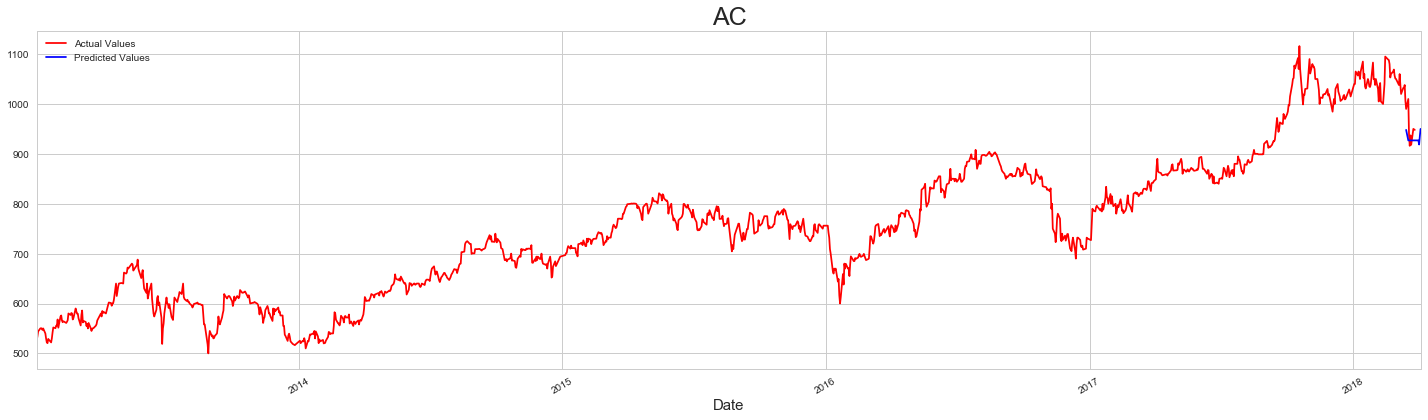

In [80]:
plt.figure(figsize=(20,6))
plt.title(stock_name, fontsize=25)

stock['Close'].plot(label='Actual Values', color=actual_color)
stock_Future['Predicted'].plot(label='Predicted Values', color=pred_color)


plt.legend()
#plt.ylabel('Closing Price (₱)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xlim(xmin=stock.index[0],xmax=stock_Future.index[-1])
plt.xticks(ha='center')

plt.tight_layout()

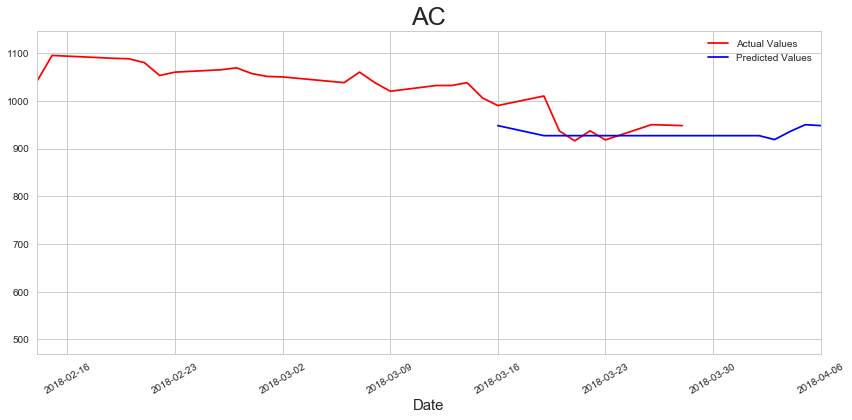

In [81]:
plt.figure(figsize=(12,6))
plt.title(stock_name, fontsize=25)

stock['Close'].plot(label='Actual Values', color=actual_color)
stock_Future['Predicted'].plot(label='Predicted Values', color=pred_color)


plt.legend()
#plt.ylabel('Closing Price (₱)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xlim(xmin=stock.index[-30], xmax=stock_Future.index[-1])
plt.xticks(ha='center')

plt.tight_layout()

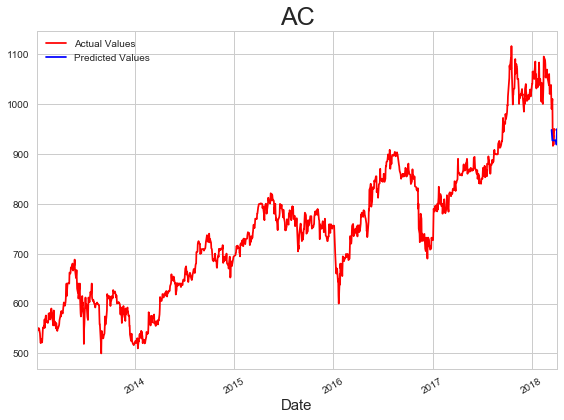

In [83]:
plt.figure(figsize=(8,6))
plt.title(stock_name, fontsize=25)

stock['Close'].plot(label='Actual Values', color=actual_color)
stock_Future['Predicted'].plot(label='Predicted Values', color=pred_color)


plt.legend()
#plt.ylabel('Closing Price (₱)', fontsize=15)
plt.xlabel('Date', fontsize=15)
#plt.xlim(xmin=stock.index[800], xmax=stock_Future.index[100])
plt.xticks(ha='center')

plt.tight_layout()

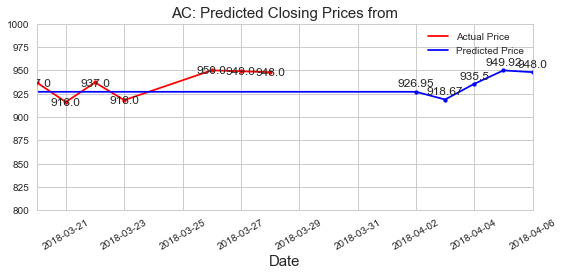

In [85]:
plt.figure(figsize=(8,4))
plt.title(stock_name+': Predicted Closing Prices from', fontsize=15)

stock['Close'].plot(label='Actual Price', color=actual_color, legend=True)
stock_Future['Predicted'].plot(label='Predicted Price', color=pred_color, legend=True)

for i, txt in enumerate(stock_future['Predicted']):
    plt.annotate(txt, (stock_future.index[i],stock_future['Predicted'][i]), 
                xytext=(stock_future.index[i],stock_future['Predicted'][i]+3),
                horizontalalignment='center', verticalalignment='bottom')
                #arrowprops=dict(arrowstyle="-",color=pred_color))
    
for i, txt in enumerate(stock_c['Actual']):
    plt.annotate(txt, (stock_c.index[i],stock_c['Actual'][i]), 
                xytext=(stock_c.index[i],stock_c['Actual'][i]-6),
                horizontalalignment='center', verticalalignment='bottom', clip_on=True)
                #arrowprops=dict(arrowstyle="-",color=actual_color))

plt.scatter(stock_c.index,stock_c['Actual'], s=15, color =actual_color)   
plt.scatter(stock_Future.index,stock_Future['Predicted'], s=15, color=pred_color)  

#plt.ylabel('Closing Price (₱)', fontsize=15)
plt.xlabel('Date', fontsize=15)
#plt.xlim('2018-03-20', '2018-03-29')

#plt.xlim(xStartPred, xEndPred)
plt.xlim('2018-03-20', xEndPred)
#plt.xlim('2018-03-04', '2018-03-25')
plt.ylim(ymin=800, ymax=1000)
#plt.ylim(ymin=270, ymax=320)
plt.xticks(ha='center')

plt.tight_layout()

In [ ]:
!pwd 